Sampling frequency: 1000
Signal shape: (38400, 15)
Channel names: ['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']


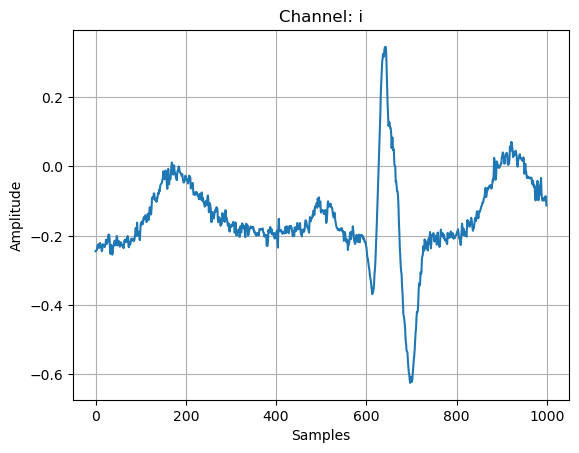

In [1]:
import wfdb

record_path = r"E:\OneDrive\المستندات\SBE\DSP\SmartSignalAI\Backend\app\data\ptb-diagnostic-ecg-database-1.0.0\patient001\s0010_re"

# قراءة الإشارة والأنوتيشن إن وجد
record = wfdb.rdrecord(record_path)

print("Sampling frequency:", record.fs)
print("Signal shape:", record.p_signal.shape)
print("Channel names:", record.sig_name)

# عرض أول 5 عينات من أول قناة
import matplotlib.pyplot as plt

plt.plot(record.p_signal[:1000, 0])
plt.title(f"Channel: {record.sig_name[0]}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [4]:
print(record.sig_name)


['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']


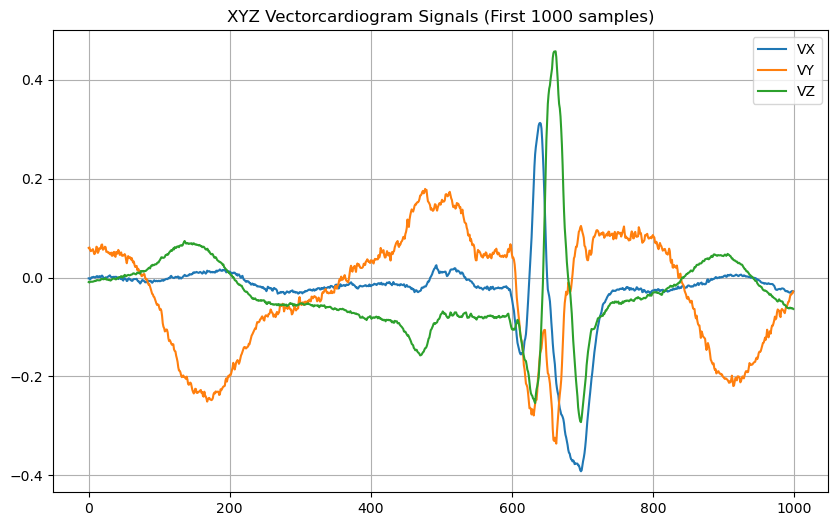

In [3]:
vx = record.p_signal[:, record.sig_name.index('vx')]
vy = record.p_signal[:, record.sig_name.index('vy')]
vz = record.p_signal[:, record.sig_name.index('vz')]

# مثال عرضهم مع بعض
plt.figure(figsize=(10, 6))
plt.plot(vx[:1000], label='VX')
plt.plot(vy[:1000], label='VY')
plt.plot(vz[:1000], label='VZ')
plt.title("XYZ Vectorcardiogram Signals (First 1000 samples)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np

def read_xyz_binary(filepath):
    with open(filepath, 'rb') as file:
        data = np.fromfile(file, dtype=np.int16)  # أو np.float32 لو الملف فيه فواصل
    return data

xyz_path = r"E:\OneDrive\المستندات\SBE\DSP\SmartSignalAI\Backend\app\data\ptb-diagnostic-ecg-database-1.0.0\patient001\s0010_re.xyz"
xyz_data = read_xyz_binary(xyz_path)

print("Data shape:", xyz_data.shape)
print("First 10 values:", xyz_data[:10])


Data shape: (115200,)
First 10 values: [ -3 120 -18  -3 122 -20  -7 111 -17  -4]


In [6]:
xyz_data = xyz_data.reshape(-1, 3)  # [38400, 3]
print("Reshaped xyz data:", xyz_data.shape)
print("First 5 rows:\n", xyz_data[:5])


Reshaped xyz data: (38400, 3)
First 5 rows:
 [[ -3 120 -18]
 [ -3 122 -20]
 [ -7 111 -17]
 [ -4 107 -16]
 [  1 109 -17]]


In [7]:
vx = xyz_data[:, 0]
vy = xyz_data[:, 1]
vz = xyz_data[:, 2]


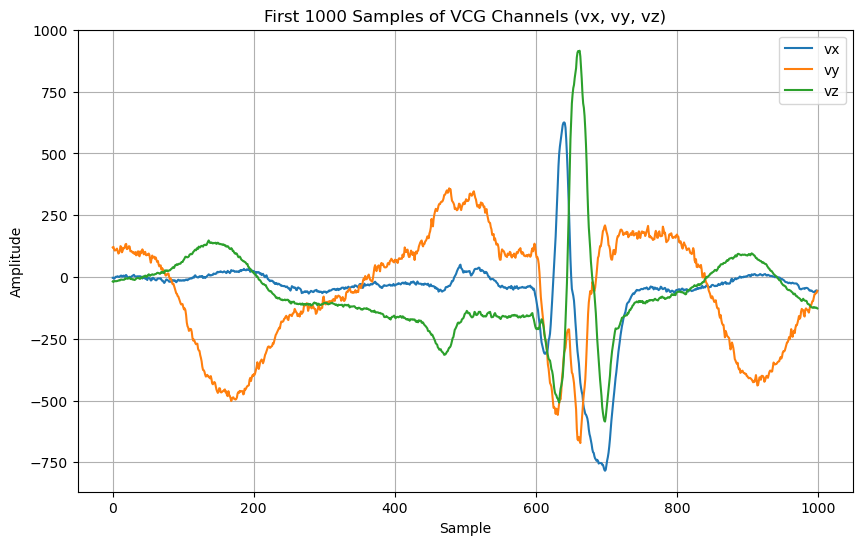

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(vx[:1000], label='vx')
plt.plot(vy[:1000], label='vy')
plt.plot(vz[:1000], label='vz')
plt.title("First 1000 Samples of VCG Channels (vx, vy, vz)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from wfdb import rdrecord

record_path = r"E:\OneDrive\المستندات\SBE\DSP\SmartSignalAI\Backend\app\data\ptb-diagnostic-ecg-database-1.0.0\patient001\s0010_re"
record = rdrecord(record_path)

vcg_from_wfdb = record.p_signal[:, -3:]  # vx, vy, vz

print("Equal to wfdb data?", np.allclose(vcg_from_wfdb, xyz_data, atol=1e-3))


Equal to wfdb data? False


In [10]:
np.max(np.abs(record.p_signal[:, -3:] - xyz_data))


np.float64(1228.3855)

In [14]:
xyz_data_scaled = xyz_data / np.max(np.abs(xyz_data)) * np.max(np.abs(record.p_signal[:, -3:]))
max_diff_scaled = np.max(np.abs(record.p_signal[:, -3:] - xyz_data_scaled))
print("Max difference after scaling:", max_diff_scaled)



Max difference after scaling: 1.1102230246251565e-16


ده معناه إن ملف .xyz بيحتوي على نفس البيانات زي القنوات الثلاثة الأخيرة في ملف الـ WFDB record.p_signal لكن يمكن مخزنة بمقياس مختلف أو صيغة مختلفة، وبعد التعديل اتحولت لنفس المقياس.
